# Template of  jupyter notebook for analysis of WAXS

# Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

In [2]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

## Define path

In [3]:
scat = 'SAXS'
det = '1M'

proposal = '308052_Zhang' 
cycle = '2020_Cycle3'
beamline = 'SMI'

username = 'CWang' 
 
inDir ='/home/yuzhang/NSLSII_Data_Link/SMI/%s/%s/raw_data/%s/'%(cycle, proposal, det )
print('The input dir is: %s'%inDir)

outDir0_ = '/home/yuzhang/NSLSII_Data_Link/SMI/%s/%s/Results/'%(cycle, proposal  )
outDir0_ = create_fullpath(  outDir0_ )
outDir0 = create_fullpath(  outDir0_ + username + '/' )
print('The output dir is: %s'%outDir0)

The input dir is: /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/raw_data/1M/
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/  already exists
The output dir is: /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/


In [4]:
flag_save = True 

outDir1 = create_fullpath(  outDir0   + '%s/'%(scat)) 
outDir = create_dir(  'Results/', outDir1 )
create_dir( '%s/Results/TIFF/'%(scat), outDir0  )
outDir_HDF =  create_dir(  'HDF_Results/', outDir0 )
outDir_ResPipe = create_dir(  'ResPipes/', outDir1 )

print( outDir )
print( outDir_HDF)
print( outDir_ResPipe)

Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/SAXS/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/SAXS/Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/SAXS/Results/TIFF/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/HDF_Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/SAXS/ResPipes/  already exists
/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/SAXS/Results/
/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/HDF_Results/
/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/SAXS/ResPipes/


# Find data

In [5]:
username_ = 'CW'

flists1 = ls_dir( inDir, and_list=[ username_ ], no_list=['GB'])
flists2 = ls_dir( inDir, and_list=[ 'Al' ], no_list=[ ])
flists =  np.concatenate( [ flists1, flists2])  
Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username))

There are 102 files for user: CWang in this run.


In [6]:
 flists2

array(['_Al_125um_window_x-18008.58_y-4900.28_det6500.0m_expt2s_attNone_sid00135626_000001_SAXS.tif',
       '_Al_125um_window_x-18008.59_y-4900.28_det6500.0m_expt0.05s_attNone_sid00135630_000001_SAXS.tif',
       '_Al_125um_window_x-18008.58_y-4900.29_det6500.0m_expt5s_attNone_sid00135627_000001_SAXS.tif',
       '_Al_125um_window_x-18008.57_y-4900.29_det6500.0m_expt0.1s_attNone_sid00135624_000001_SAXS.tif',
       '_Al_125um_window_x-18008.6_y-4900.29_det6500.0m_expt0.2s_attNone_sid00135632_000001_SAXS.tif',
       '_Al_125um_window_x-18008.58_y-4900.29_det6500.0m_expt1s_attNone_sid00135625_000001_SAXS.tif',
       '_Al_125um_window_x-18008.59_y-4900.28_det6500.0m_expt0.01s_attNone_sid00135629_000001_SAXS.tif',
       '_Al_125um_window_x-18008.6_y-4900.29_det6500.0m_expt0.5s_attNone_sid00135631_000001_SAXS.tif',
       '_Al_125um_window_x-18008.59_y-4900.29_det6500.0m_expt10s_attNone_sid00135628_000001_SAXS.tif'],
      dtype='<U94')

## Find a sub-list

In [7]:
sam_dict, sams = get_Unique_SamDict_from_list( flists, cut_pattern= r'[_][x]', starting_point=0,     )   
ks =  sorted(list(sams.keys()))
N = len(ks)
print( 'There are %s samples.'%(N))

There are 44 samples.


In [8]:
#ks

In [9]:
sams

{'CW_CW39': 2,
 'CW_CW32': 2,
 'CW_CW35': 2,
 'CW_CW18_3D_Octa_peptoid_NP0.5_EDTA3': 1,
 'CW_CW29_Buffer_peptoid_NP0.5_EDTA_6': 3,
 'CW_CW16_3D_Octa_peptoid_NP10_EDTA3': 2,
 'CW_CW14_3D_Octa_peptoid_NP0.1': 2,
 'CW_CW1_3D_Octa_peptoid_NP10_EDTA12': 7,
 'CW_CW22_Buffer_peptoid_NP10_EDTA_12': 2,
 'CW_CW23_Buffer_peptoid_NP2_EDTA_12': 2,
 'CW_CW15_3D_Octa': 6,
 'CW_CW37': 4,
 'CW_CW42': 2,
 'CW_CW4_3D_Octa_peptoid_NP0.1_EDTA12': 1,
 'CW_CW41': 2,
 'CW_CW3_3D_Octa_peptoid_NP0.5_EDTA12': 2,
 'CW_CW5_3D_Octa_EDTA12': 1,
 'CW_CW24_Buffer_peptoid_NP0.5_EDTA_12': 5,
 'CW_CW36': 2,
 'CW_CW40': 2,
 'CW_CW30_Buffer_peptoid_NP0.1_EDTA_6': 2,
 'CW_CW43': 2,
 'CW_CW33': 2,
 'CW_CW11_3D_Octa_peptoid_NP10': 3,
 'CW_Cw7_3D_Octa_peptoid_NP2_EDTA6': 4,
 'CW_CW34': 2,
 'CW_CW26_Buffer_EDTA_12': 2,
 'CW_CW10_3D_Octa_EDTA6': 1,
 'CW_CW27_Buffer_peptoid_NP10_EDTA_6': 2,
 'CW_CW8_3D_Octa_peptoid_NP0.5_EDTA6': 1,
 'CW_CW21_3D_Octa': 1,
 'CW_CW28_Buffer_peptoid_NP2_EDTA_6': 2,
 'CW_CW12_3D_Octa_peptoid_NP2': 2,


# Test one data for sort

In [10]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/IO.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [11]:
i = 11
sam =  ks[i] 
print( sam )
flist  = sam_dict[ ks[i]]
sflistd = sort_fnlist( flist, pattern='', cut_beg = -22, cut_end=-16, method='cut_from_end' )
sflist = np.array( list(sflistd.values()) )
sflist 
sflistd



CW_CW20_3D_Octa_EDTA3


{'135484': 'CW_CW20_3D_Octa_EDTA3_x-17908.56_y-4600.32_det6500.0m_expt1s_attNone_sid00135484_000001_SAXS.tif'}

In [12]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

# A loop to sort

* here particularly for a humidity

In [13]:
ssam_dict = {}    
for sam in ks:     
    #print( 'The sample is: %s.'%sam)
    flist = np.sort( sam_dict[ sam ] )
    sflistd = sort_fnlist( flist, pattern='', cut_beg = -22, cut_end=-16, method='cut_from_end' )
    sflist = np.array( list(sflistd.values()) )
    sd = sflistd  
    ssam_dict[sam] =sd

    

In [14]:
sd

{'135624': '_Al_125um_window_x-18008.57_y-4900.29_det6500.0m_expt0.1s_attNone_sid00135624_000001_SAXS.tif',
 '135625': '_Al_125um_window_x-18008.58_y-4900.29_det6500.0m_expt1s_attNone_sid00135625_000001_SAXS.tif',
 '135626': '_Al_125um_window_x-18008.58_y-4900.28_det6500.0m_expt2s_attNone_sid00135626_000001_SAXS.tif',
 '135627': '_Al_125um_window_x-18008.58_y-4900.29_det6500.0m_expt5s_attNone_sid00135627_000001_SAXS.tif',
 '135628': '_Al_125um_window_x-18008.59_y-4900.29_det6500.0m_expt10s_attNone_sid00135628_000001_SAXS.tif',
 '135629': '_Al_125um_window_x-18008.59_y-4900.28_det6500.0m_expt0.01s_attNone_sid00135629_000001_SAXS.tif',
 '135630': '_Al_125um_window_x-18008.59_y-4900.28_det6500.0m_expt0.05s_attNone_sid00135630_000001_SAXS.tif',
 '135631': '_Al_125um_window_x-18008.6_y-4900.29_det6500.0m_expt0.5s_attNone_sid00135631_000001_SAXS.tif',
 '135632': '_Al_125um_window_x-18008.6_y-4900.29_det6500.0m_expt0.2s_attNone_sid00135632_000001_SAXS.tif'}

# Load mask

In [15]:
mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Mask/mask_waxs_2020C3_YG.npy')
show_img(mask)


<IPython.core.display.Javascript object>

## Define parameters

In [16]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py

In [17]:
geometry   = 'Transmission'
wav_m = 1E-10 * (12.398/16.1)
sdd_mm = 6500.00
b_xy = [487, 561]
bs_xy = [ 486+3, 540  ]
incident_angle = 0
det_str = 'Pilatus1m'
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, # 'Fang', 
                cycle =  cycle, # ='2020_Cycle2',
                beamline = beamline, #'SMI',
                outDir = outDir, )
              # mask = mask )

In [18]:
%matplotlib inline


In [19]:
#%matplotlib notebook

# Do data reduction

In [20]:
T = True
F = False

In [21]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py

In [22]:
do_plot = T #True 
do_plot_raw = T # True
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_qimg = F
do_show_plot = T
save_raw = T

##################
#for SAXS
####################
do_qphi = F  #True
do_stitch = False
do_q_qphi = False #True
do_p_qphi = False #True

do_ciravg = T #False  #True  


do_ciravg_sector = F #False  #True
#for the angle range, the v-up is ~0, l-left, ~90;  v-down ~ 180/-180; h-right -90, 
ciravg_sector_angle_wid = 20 
ciravg_sector_angles = [  0, 90, 180, -90   ]
show_ciravg_sector = F

###########################
#for GiSAXS
###########################
do_linecut_qz = F #False #True
#qz_cuts= [0.04, 0.08, 0.15 ]
#qz_wid = 0.0025
show_linecut_qz = F # T
mark_Yon = F




In [23]:
#ks

In [24]:
sample_list = ks[:]
#sample_list = ks   #use a dummy papemill to run this

In [25]:
#plt.ioff()
#plt.ion()

In [26]:
#ssam_dict[  'CW_CW20_3D_Octa_EDTA3' ]

The sample is: CW_CW20_3D_Octa_EDTA3.
The file: saxs_q_iq_CW_CW20_3D_Octa_EDTA3_x-17908.56_y-4600.32_det6500.0m_expt1s_attNone_sid00135484_000001_SAXS.tif.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/CWang/SAXS/Results/


/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


Done


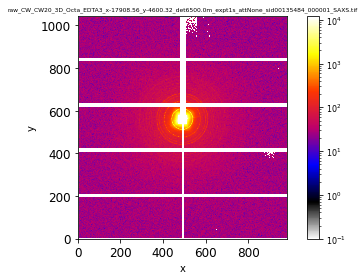

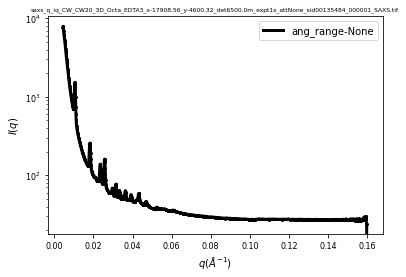

In [27]:
# for this simple transimission measurement, we can use a same AI    
SC =  Scattering( pargs_sc  )   
SC.create_ai()
        
#loop all samples
for sam in sample_list:         
#for sam in [  'CW_CW20_3D_Octa_EDTA3' ]:   
    print( 'The sample is: %s.'%sam)    
    K0_dict = ssam_dict[sam]
    K0 = list( K0_dict.keys() )    
    RES = {}   
    hi = 0 
    #loop all sids for this sample
    for k0 in  K0:    
        RES[k0]={}
        fp = K0_dict[k0]
        full_filenames = [ inDir +   fp   ]  
        SC.md['sample'] = sam
        SC.load_data( full_filenames )
        saved_plots = {}  
        saved_data = {}        
        #SC.md['sid'] =  []
        #######################################
        #plot the raw data
        ########################################
        i = 0 #in this dataset, there is only one file
        sami = SC.md['filenames'][i]  
        sid = k0 #sami[ -24: -19]             
        SC.md['sid'] = sid
        d = SC.imgs[i] * ~mask
         
        if do_plot_raw:
            title='raw_%s'%(sami)
            fig, ax= plt.subplots()
            SC.plot_img( img=SC.imgs[i] * ~mask, title=title, vmin= None, vmax= None, save=True, 
                         fig_ax=[fig,ax],mask= ~mask, fontsize=6 )
            if not do_show_plot:
                plt.close(fig)                
            saved_plots['raw'] = title + '.png'            
        if do_ciravg:   
            Prange =  None
            Qrange =  None    
            q_ca,iq_ca = SC.img_circular_average(img=SC.imgs[i],Qrange=Qrange,Prange=Prange,
                                                 bins=1500,method='ai',mask=mask)                
            title =  'saxs_q_iq_%s'%(sami)
            save_arrays(  data= [q_ca, iq_ca], label= ['q_ca','iq_ca'], dtype='list', 
                        filename=title+'.csv', path= SC.outDir, return_res = False,verbose=True) 
            saved_data['qiq'] = title+'.csv'  
            if do_plot:                    
                SC.plot_q_iq( q_ca,iq_ca, legend = 'ang_range-%s'%Prange,
                             title =  title, figsize=[ 6,4  ], save=True , fontsize=6 ) 
                saved_plots['qiq'] = title + '.png'
                    
        if do_qphi:  
            qphi_bins = [ 500, 180 ]
            Prange =  None
            Qrange =  None            
            q_QP, phi_QP, qphi_QP = SC.img_to_qphi(img=SC.imgs[i],Qrange=Qrange,Prange=Prange,                                                      
                                                      bins=qphi_bins,method='ai',mask=mask)   
            if do_q_qphi:
                q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
            if do_p_qphi:  
                p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, )            
            if do_plot:
                title = 'qphi_%s'%sami
                SC.plot_qphi( qphi_QP, q_QP, phi_QP, vmin= None,
                              vmax=None, aspect= 0.0005,
                              title= title , save=True, fontsize=6 ) 
                saved_plots['qphi'] = title + '.png'                 
            
        if do_qimg:
            title = 'qimg_%s'%(sami)
            qimg, qx, qz = SC.img_to_qimg( img = SC.imgs[i], bins=None, mask= mask, x='Qr', y='Qz', method = 'ai'  )
            #save to tiff?
            #save_array_to_tiff( qimg, SC.outDir + title 
            saved_plots['qimg'] = title + '.png'
            if do_plot:
                fig, ax= plt.subplots()
                SC.plot_qrz( img=qimg, x=qx, y=qz, fig_ax=[fig,ax], title=title, 
                             fontsize=6, vmin=None, vmax=None  )
                if mark_Yon:
                    ax.hlines( qYo, qx.min(),qx.max(), linewidth=1,color='r', linestyle = '--',    ) 
                if not do_show_plot:
                    plt.close(fig)
                plt.savefig( outDir + title + '.png' )                    
            qimg_mask = (qimg == 0) 
            
        if do_linecut_qz:
            #Prange = [ [ qzi - qz_wid, qzi + qz_wid ] for qzi in qz_cuts  ]
            saved_data['lqz'] = []
            qz_cuts= [ qYo  ]
            qz_wid = 0.0025
            qiqs_lcqz = SC.qimg_linecut_qzs( qimg , qx_range=qx, qz_range=qz,
                                  qz_cuts=qz_cuts, qz_wid=qz_wid,  
                                   Qrange=[qx.min(), qx.max()], mask= ~qimg_mask  ) 

            title =  'saxs_linecut_qz_iqs_%s'%(sami)
            for kx in list( qiqs_lcqz.keys() ):                    
                save_arrays(  data=qiqs_lcqz[kx], label= ['qr','qz=%s'%kx], dtype='array', 
                        filename=title+'_qz=%s.csv'%kx, path= SC.outDir, return_res = False,verbose=True) 
                saved_data['lqz'].append( title+'_qz=%s.csv'%kx  )    
            saved_plots['lqz'] = title + '.png'                  
            if do_plot:    
                fig, ax= plt.subplots()
                SC.plot_stacked_multi_curves( xys = qiqs_lcqz, yshift = 1e2, save=True,fig_ax=[fig,ax],
                                      xlabel= r'$q_r(\AA^{-1})$', title =  title, fontsize=8 )
                if not do_show_plot:
                    plt.close(fig)                    

            if do_plot:
                if show_linecut_qz:                     
                    fig, ax = plt.subplots()
                    title='qimg_%s'%(sami)
                    SC.plot_qrz( img=qimg, x=qx, y=qz,title =  title , fontsize=6 , fig_ax = [fig,ax])
                    for qzc in qz_cuts:
                        plot1D( x= [ qx[0], qx[-1]] , y = [qzc, qzc], ls='-', ax =ax, 
                               lw=1, m='',c ='r', legend='qz=%s'%qzc )
                    plt.savefig( SC.outDir + 'qimg_lincut_qz_%s'%(sami)) 
                    saved_plots['lqz'] = title + '.png'
        if do_ciravg_sector:   
            Prange =   [ [w-ciravg_sector_angle_wid, w+ciravg_sector_angle_wid] for w in  ciravg_sector_angles  ]
            Qrange =  None            
            q_cas,iq_cas, qmask_cas = SC.qimg_circular_average_sector(qimg , qx, qz,
                                        Qrange=Qrange,Prange=Prange,bins=1500,mask= ~qimg_mask)   
            title =  'saxs_qs_iqs_%s'%(sami)
            SC.plot_multi_curves( xs = q_cas, ys = iq_cas, yshift = 1e2, #fig_ax = [fig,ax], 
                                  legends = Prange,title =  title,
                                  figsize=[ 6,4  ], save=True , fontsize=6 )    
            saved_plots['qiq_sec'] = title + '.png'
            if show_ciravg_sector:
                N = len(Prange)
                fig,axes=create_fig_ax( H=1,V=N, figsize=[8,4],  y=1.08, title='ciravg_sector_cuts' )
                for i, ki in enumerate(list(qmask_cas.keys())):
                    show_img( qmask_cas[ ki ], ax=[fig, axes[i]])

        res = SC.res_to_dict( do_ciravg =do_ciravg, do_qphi = do_qphi, do_qimg=do_qimg,
                             do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,
                             do_linecut_qz = do_linecut_qz,  save_raw=save_raw,
                             do_ciravg_sector = do_ciravg_sector )

        res['md'] = {} 
        res['md'].update( SC.md   )
        RES[k0].update(  res  )
        RES[k0]['saved_plots'] = saved_plots 
        RES[k0]['saved_data'] = saved_data             

    dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),
                         h5path='/SAXS/', mode='a', overwrite_data=True)

print('Done')    


        

# The END!

In [28]:
if F:
    fig, ax = plt.subplots()
    qimgc = qimg.copy()
    rc = 630
    ring_mask = create_ring_mask( qimg.shape, r1=rc-10, r2=rc+10, center = [450, 186 ]  )
    qimgc[ring_mask] *=1e3


    SC.plot_img( img=qimgc, title='qimg_%s'%(sami), fontsize=6 , fig_ax = [fig,ax])
    #SC.plot_qrz( img=qimg, x=qx, y=qz, title='qimg_%s'%(sami), fontsize=6 , fig_ax = [fig,ax])

